In [1]:
# Preparing the notebook by importing necessary modules
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Acquire 

In [4]:
import acquire

In [5]:
# Loading the acquired data into a data frame called acquired. This is my raw data from the Codeup Student Database.
acquired= acquire.get_telco_data()

In [6]:
#Visualizing the column names, amount of nulls, amount of entries per column and column data types
acquired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

#### Using .info, we are able to visualize that there are 7043 clients with telco.  The data types that make up the dataframe consist of integers, objects, and floats.

#### Visualizing the basic statistical details such as percentile, mean, std etc. of the numerical values in a data frame

In [7]:
# Dropping the Unnamed column before proceeding due to it being a int64 column
acquired= acquired.drop(columns=['Unnamed: 0'])

In [8]:
acquired.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


#### Plotting the distributions of the numerical columns

Text(0, 0.5, 'Count of Clients in each Tenure')

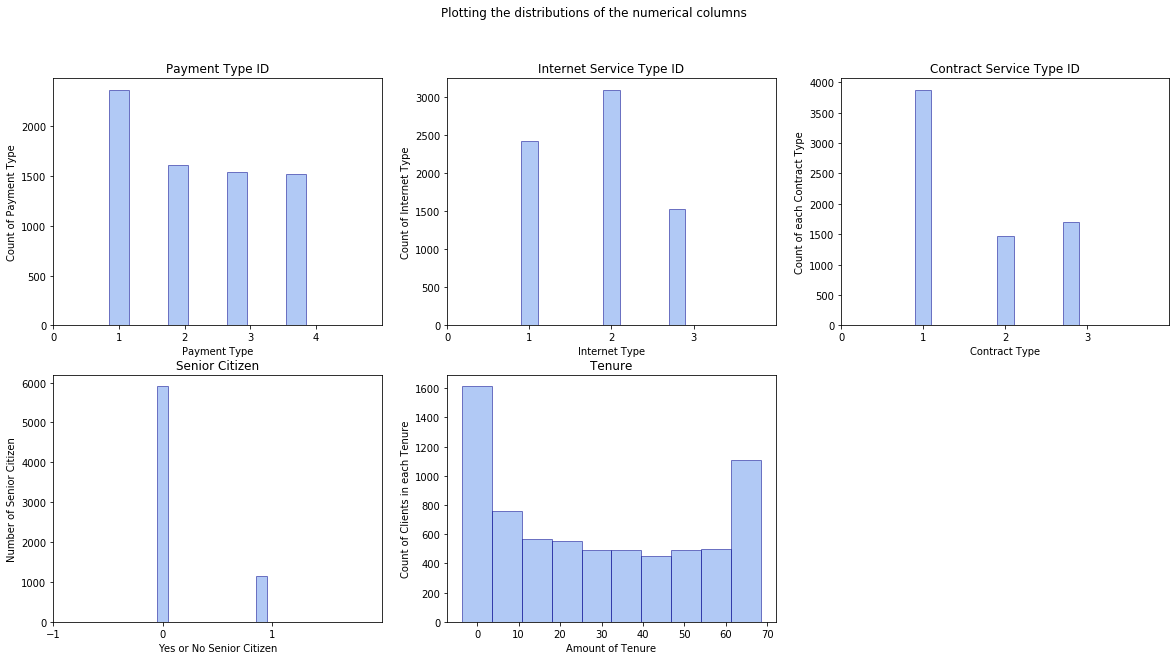

In [9]:
plt.figure(figsize=(20, 10))

plt.suptitle("Plotting the distributions of the numerical columns")
# row, columns, index
plt.subplot(2, 3, 1)
plt.hist(acquired.payment_type_id, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Payment Type ID')
plt.xlabel("Payment Type")
plt.ylabel("Count of Payment Type")
plt.xlim([0, 5])
plt.xticks(np.arange(0, 5, 1))

plt.subplot(2, 3, 2)
plt.hist(acquired.internet_service_type_id, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Internet Service Type ID')
plt.xlabel("Internet Type")
plt.ylabel("Count of Internet Type")
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4, 1))

plt.subplot(2, 3, 3)
plt.hist(acquired.contract_type_id, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Contract Service Type ID')
plt.xlabel("Contract Type")
plt.ylabel("Count of each Contract Type")
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4, 1))

plt.subplot(2, 3, 4)
plt.hist(acquired.senior_citizen, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Senior Citizen')
plt.xlabel("Yes or No Senior Citizen")
plt.ylabel("Number of Senior Citizen")
plt.xlim([0, 2])
plt.xticks(np.arange(-1, 2, 1))

plt.subplot(2, 3, 5)
plt.hist(acquired.tenure, align='left', edgecolor='darkblue', alpha=0.5, color='cornflowerblue')
plt.title('Tenure')
plt.xlabel("Amount of Tenure")
plt.ylabel("Count of Clients in each Tenure")

# Prepare 

In [10]:
import prepare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [11]:
# importing the cleaned telco data
telco = prepare.clean_telco()

In [13]:
# visualizing the cleaned telco data
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   multiple_lines         7043 non-null   object 
 2   monthly_charges        7043 non-null   float64
 3   total_charges          7043 non-null   object 
 4   contract_type          7043 non-null   object 
 5   internet_service_type  7043 non-null   object 
 6   payment_type           7043 non-null   object 
 7   years_tenure           7043 non-null   float64
 8   is_family              7043 non-null   bool   
 9   is_senior              7043 non-null   bool   
 10  has_phones             7043 non-null   bool   
 11  has_paperless_billing  7043 non-null   bool   
 12  has_streaming          7043 non-null   bool   
 13  has_support_features   7043 non-null   bool   
 14  has_security_features  7043 non-null   bool   
 15  is_c

In [18]:
#Describing the object columns
# describe object columns
obj_cols = telco.columns[[telco[col].dtype == 'O' for col in telco.columns]]
for col in obj_cols:
    print(telco[col].value_counts(),'\n', '\n')
    print(telco[col].value_counts(normalize=True, dropna=False))

Male      3555
Female    3488
Name: gender, dtype: int64 
 

Male      0.504756
Female    0.495244
Name: gender, dtype: float64
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64 
 

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64
20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
81.25       1
4805.65     1
8033.1      1
3838.75     1
1010        1
Name: total_charges, Length: 6531, dtype: int64 
 

20.2       0.001562
           0.001562
19.75      0.001278
19.9       0.001136
20.05      0.001136
             ...   
81.25      0.000142
4805.65    0.000142
8033.1     0.000142
3838.75    0.000142
1010       0.000142
Name: total_charges, Length: 6531, dtype: float64
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64 
 

Month-to-month    0.550192
Two year          0.2406

In [19]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of monthly_charges by binning
telco.monthly_charges.value_counts(bins=5, sort=False)

(18.148999999999997, 38.35]    1797
(38.35, 58.45]                 1005
(58.45, 78.55]                 1367
(78.55, 98.65]                 1826
(98.65, 118.75]                1048
Name: monthly_charges, dtype: int64

In [21]:
# Checking the dataframe for null values
missing = telco.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)